## TODO
1. Add surface temp and skin temp to rtmodel call
2. Add transect filepath to transect summary - filter on just transects
3. Plot time series of fluxes
4. Compare estimated downwelling SW and observed SW

In [1]:
import sys
sys.path.append("../mosaic_underice_sunlight/")

import warnings  # to ignore future warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from rtmodel import seaicert_mp
from plotting import plot_results, plot_thickness_profile
from mosaic_thickness import load_cleaned_transect
from filepath import CLEAN_DATAPATH

from data.get_metdata_for_transects import load_transect_summary

/home/apbarret/mambaforge/envs/mosaic_underice_sunlight/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transects = pd.read_csv("../data/transect_surface_forcing.csv",
                        index_col=0, parse_dates=True,
                        date_format="%Y-%m-%dT%H:%M:%S")
transects = transects.dropna(axis=0)
transects = transects[transects.rsd > 0.]  # Make sure sun is up
transects.head()

,activity,start_time,end_time,rsd,tas,skin_temp_surface
0,20191024_PS122-1_4-1,2019-10-24 05:23:21,2019-10-24 06:49:16,0.095640,261.721008,-11.348980
48,20200226_PS122-3_29-67,2020-02-26 10:51:56,2020-02-26 11:01:01,0.658667,246.626246,-27.525646
57,20200320_PS122-3_32-95,2020-03-20 12:28:48,2020-03-20 13:45:15,26.930857,248.323081,-26.366767
58,20200326_PS122-3_33-91,2020-03-26 11:42:00,2020-03-26 12:47:06,87.586808,245.952448,-27.842989
59,20200326_PS122-3_33-92,2020-03-26 13:07:46,2020-03-26 13:21:40,81.366046,245.883918,-27.991197


In [3]:
activity_id = "20200707_PS122-4_46-235"
filepaths = list((CLEAN_DATAPATH / "MOSAiC_magnaprobe").glob(f"{activity_id}/*transect.csv"))
filepaths

[PosixPath('/home/apbarret/Data/Sunlight_under_seaice/MOSAiC_Observations/clean/MOSAiC_magnaprobe/20200707_PS122-4_46-235/magnaprobe_and_gem2_transect_20200707_PS122-4_46-235_transect.csv')]

In [4]:
df = load_cleaned_transect(filepaths[0])
df

,lon,lat,local_x,local_y,ice_thickness_m,snow_depth_m,melt_pond_depth_m,surface_type,transect_distance_m,ice_thickness_flag
date/time,,,,,,,,,,
2020-07-07 11:29:12,4.55472,81.64364,-158.862910,-73.024437,4.007144,0.04157,0.0,1,0.000000,1
2020-07-07 11:29:16,4.55482,81.64363,-160.147733,-72.729643,4.025074,0.02364,0.0,1,1.318209,1
2020-07-07 11:29:20,4.55486,81.64363,-162.221738,-70.744884,4.674883,0.06286,0.0,1,4.188882,1
2020-07-07 11:29:24,4.55499,81.64361,-164.114174,-70.230695,4.576121,0.04885,0.0,1,6.149928,1
2020-07-07 11:29:28,4.55507,81.64360,-165.966405,-67.048116,4.440539,0.05389,0.0,1,9.832260,1
...,...,...,...,...,...,...,...,...,...,...
2020-07-07 14:52:15,4.30456,81.63055,237.589097,-32.930674,1.655439,0.05839,0.0,1,3322.684361,1
2020-07-07 14:52:19,4.30462,81.63057,236.141323,-32.178630,1.677709,0.07072,0.0,1,3324.315809,1
2020-07-07 14:52:22,4.30468,81.63058,233.025668,-32.989948,1.754580,0.04382,0.0,1,3327.535365,1


In [5]:
%%time
rt_df = seaicert_mp(df)

CPU times: user 583 ms, sys: 8.89 ms, total: 592 ms
Wall time: 591 ms


In [6]:
rt_df

,datetime,latitude,snow_depth_m,melt_pond_depth_m,ice_thickness_m,sw_absorbed_by_ocean,downwelling_radiative_flux_absorbed_by_ocean,surface_albedo,surface_downwelling_radiative_flux,transect_distance_m,par_absorbed_by_ocean
transect_distance_m,,,,,,,,,,,
0.000000,2020-07-07 11:29:12,81.64364,0.04157,0.0,4.007144,0.175220,0.175220,0.839727,348.723328,0.000000,0.613271
1.318209,2020-07-07 11:29:16,81.64363,0.02364,0.0,4.025074,0.240374,0.240374,0.816165,338.386292,1.318209,0.841310
4.188882,2020-07-07 11:29:20,81.64363,0.06286,0.0,4.674883,0.059122,0.059122,0.852539,354.631470,4.188882,0.206925
6.149928,2020-07-07 11:29:24,81.64361,0.04885,0.0,4.576121,0.080611,0.080611,0.845177,351.211304,6.149928,0.282137
9.832260,2020-07-07 11:29:28,81.64360,0.05389,0.0,4.440539,0.087755,0.087755,0.848196,352.605988,9.832260,0.307144
...,...,...,...,...,...,...,...,...,...,...,...
3322.684361,2020-07-07 14:52:15,81.63055,0.05839,0.0,1.655439,1.905216,1.905216,0.850121,353.701721,3322.684361,6.668257
3324.315809,2020-07-07 14:52:19,81.63057,0.07072,0.0,1.677709,1.588185,1.588185,0.855251,356.111511,3324.315809,5.558647
3327.535365,2020-07-07 14:52:22,81.63058,0.04382,0.0,1.754580,2.129365,2.129365,0.841027,349.511688,3327.535365,7.452777


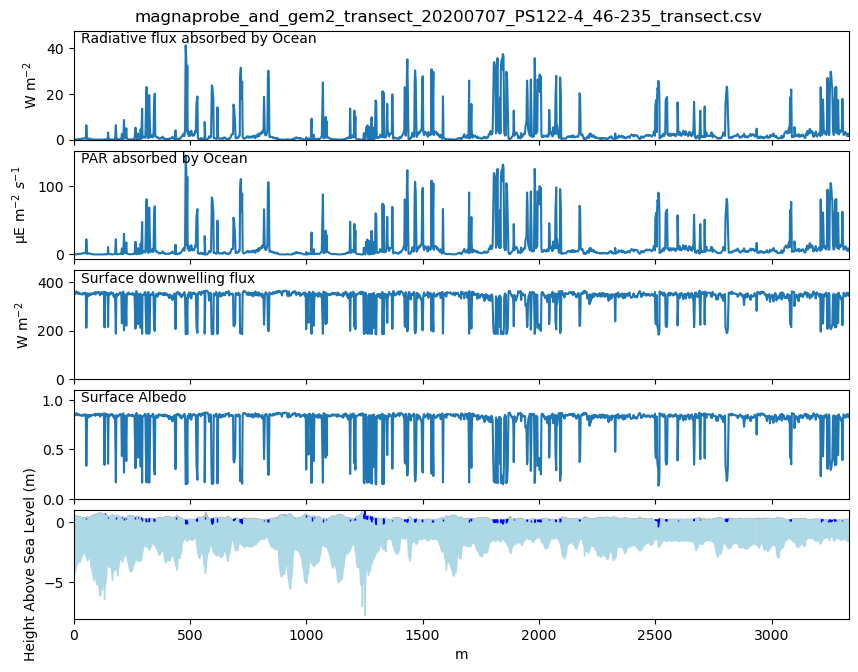

In [7]:
fig = plot_results(rt_df, title=filepaths[0].name)
fig.savefig(filepaths[0].stem + ".seaicert.png")

In [8]:
filepaths[0].parent / (filepaths[0].stem + ".seaicert.png")

PosixPath('/home/apbarret/Data/Sunlight_under_seaice/MOSAiC_Observations/clean/MOSAiC_magnaprobe/20200707_PS122-4_46-235/magnaprobe_and_gem2_transect_20200707_PS122-4_46-235_transect.seaicert.png')